<a href="https://colab.research.google.com/github/DanielCCouto/Modelo-de-analise-das-metricas-RFV/blob/main/Modelos_de_Clusteriza%C3%A7%C3%A3o_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import pandas as pdimport zipfile
import os
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
zip_file_path = '/mnt/data/archive.zip'
extracted_folder_path = '/mnt/data/extracted/'

In [ ]:
csv_file_path = '/content/archive.zip'
data = pd.read_csv(csv_file_path, encoding='ISO-8859-1')

data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Descrição estatística
data.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


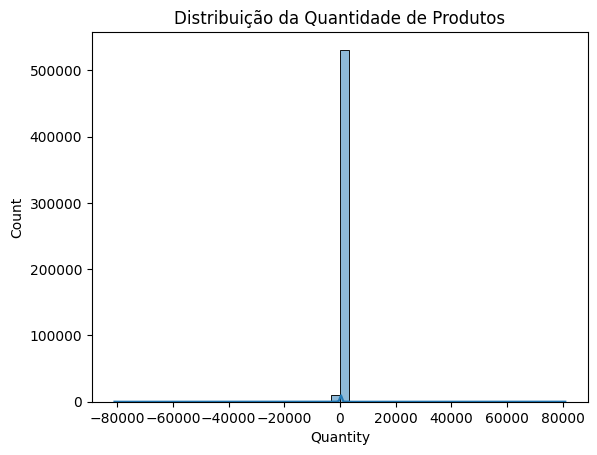

In [ ]:
# Distribuição das variáveis
sns.histplot(data['Quantity'], bins=50, kde=True)
plt.title('Distribuição da Quantidade de Produtos')
plt.show()

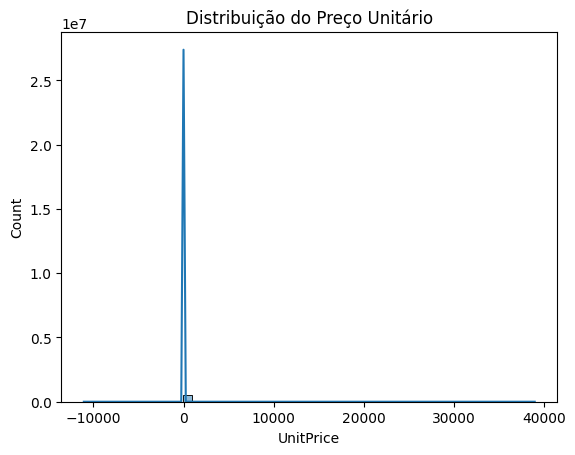

In [ ]:
sns.histplot(data['UnitPrice'], bins=50, kde=True)
plt.title('Distribuição do Preço Unitário')
plt.show()

In [ ]:
# Verificar dados nulos
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data = data.dropna()


In [ ]:
# Remover duplicatas
data.drop_duplicates(inplace=True)

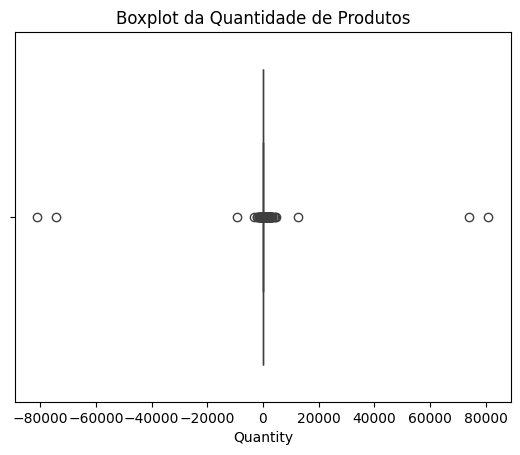

In [ ]:
# Identificar outliers nas colunas relevantes
sns.boxplot(x=data['Quantity'])
plt.title('Boxplot da Quantidade de Produtos')
plt.show()

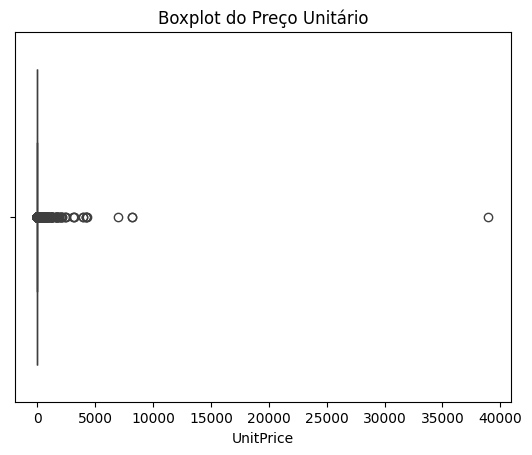

In [ ]:
sns.boxplot(x=data['UnitPrice'])
plt.title('Boxplot do Preço Unitário')
plt.show()

In [ ]:
# Seleção das variáveis relevantes (Quantity, UnitPrice, CustomerID)
relevant_data = data[['Quantity', 'UnitPrice', 'CustomerID']].dropna()

In [ ]:
# Normalização dos dados
scaler = StandardScaler()
normalized_data = scaler.fit_transform(relevant_data)

In [ ]:
# Nessa parte eu vou selecionar o algoritmo e Determinação da Quantidade Ideal de Clusters

In [ ]:
# Encontrar a quantidade ideal de clusters utilizando o método do cotovelo
inertia = []
silhouette_scores = []
range_n_clusters = list(range(2, 11))

# Reduzir o tamanho dos dados para o cálculo da pontuação de Silhouette (exemplo: 10% dos dados)
sample_size = int(0.1 * normalized_data.shape[0])
data_sample = normalized_data[np.random.choice(normalized_data.shape[0], sample_size, replace=False)]

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

    # Calcular a pontuação de Silhouette para um subconjunto dos dados
    labels = kmeans.predict(data_sample)
    silhouette_scores.append(silhouette_score(data_sample, labels))


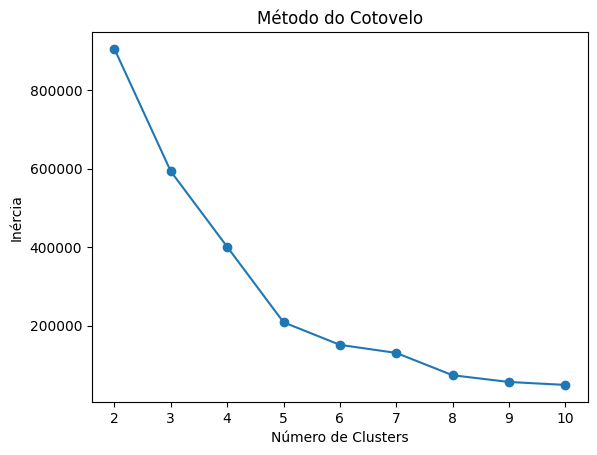

In [ ]:
# Plotar os resultados
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

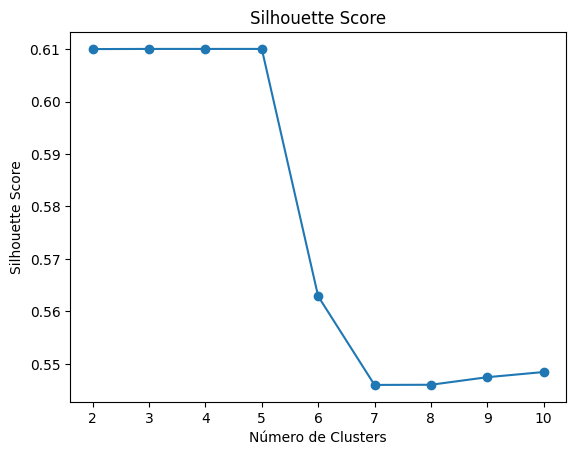

In [ ]:
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Implementação do KMeans com o número ideal de clusters
optimal_clusters = 5  # Ajuste conforme os resultados obtidos anteriormente
kmeans = KMeans(n_clusters=optimal_clusters, n_init='auto', random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Adicionar os clusters aos dados originais
relevant_data['Cluster'] = clusters


In [ ]:
# Análise dos clusters
cluster_summary = relevant_data.groupby('Cluster').mean()
print(cluster_summary)

             Quantity     UnitPrice    CustomerID
Cluster                                          
0           11.272822      2.999047  16872.508209
1           12.971530      3.704209  13903.910117
2           -1.000000  38970.000000  15098.000000
3        77605.000000      1.560000  14396.000000
4       -77605.000000      1.560000  14396.000000


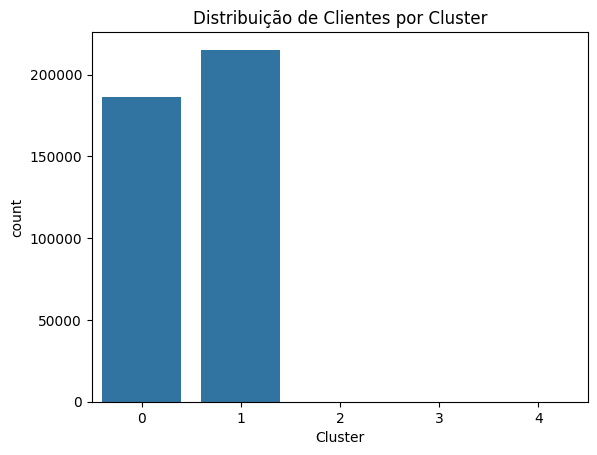

In [ ]:
# Plotar gráficos para auxiliar na análise
sns.countplot(x='Cluster', data=relevant_data)
plt.title('Distribuição de Clientes por Cluster')
plt.show()

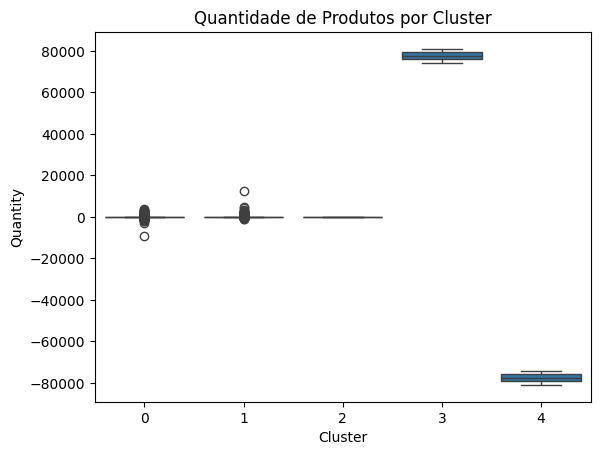

In [ ]:
sns.boxplot(x='Cluster', y='Quantity', data=relevant_data)
plt.title('Quantidade de Produtos por Cluster')
plt.show()

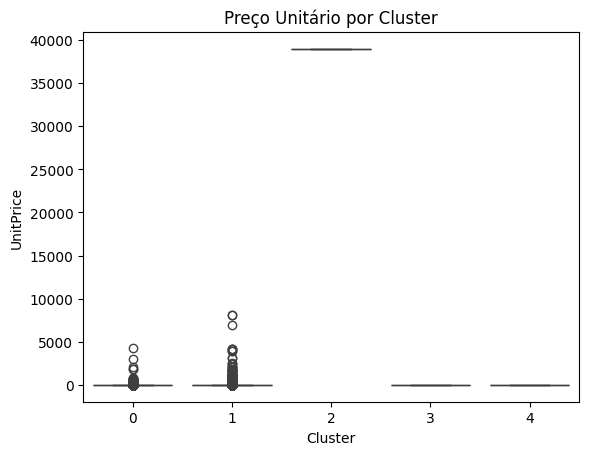

In [ ]:
sns.boxplot(x='Cluster', y='UnitPrice', data=relevant_data)
plt.title('Preço Unitário por Cluster')
plt.show()

In [ ]:
# Descrição dos perfis de clientes
for cluster_id, cluster_data in relevant_data.groupby('Cluster'):
    print(f"Cluster {cluster_id}:")
    print(cluster_data.describe())
    print("\n")


Cluster 0:
            Quantity      UnitPrice     CustomerID   Cluster
count  186319.000000  186319.000000  186319.000000  186319.0
mean       11.272822       2.999047   16872.508209       0.0
std        52.893100      16.056684     833.324515       0.0
min     -9360.000000       0.000000   15392.000000       0.0
25%         2.000000       1.250000   16143.000000       0.0
50%         4.000000       1.950000   16904.000000       0.0
75%        12.000000       3.750000   17625.000000       0.0
max      3906.000000    4287.630000   18287.000000       0.0


Cluster 1:
            Quantity      UnitPrice     CustomerID   Cluster
count  215280.000000  215280.000000  215280.000000  215280.0
mean       12.971530       3.704209   13903.910117       1.0
std        48.163825      42.460788     889.294625       0.0
min     -1200.000000       0.000000   12347.000000       1.0
25%         2.000000       1.250000   13089.000000       1.0
50%         6.000000       1.950000   14056.000000       1.0


In [ ]:
#Sugestões de Ações
#Clientes com Alta Frequência e Valor Alto: Personalizar campanhas de fidelização e ofertas exclusivas.
#Clientes com Baixa Frequência e Valor Baixo: Implementar campanhas de reengajamento com descontos.
#Clientes com Alta Frequência e Valor Baixo: Oferecer produtos complementares para aumentar o ticket médio.